# Proyek Analisis Data: Joydhef-Bike-Sharing
- Nama: Krisna Hidayat
- Email: Krisnahidayat658@gmail.com
- Id Dicoding: <a href='https://www.dicoding.com/users/krisna0703/academies'>krisna hidayat</a>
- Github: <a href='https://github.com/krisna0703'>krisna0703</a>

## **Pertanyaan Bisnis**
* Apa saja tipe pengguna Joydhef Bike setiap harinya?
* Seberapa produktifkah Joydhef Bike setiap bulannya?
* Seberapa produktif Joydhef Bike dalam 24 jam?
* Bagaimana pengaruh cuaca dan musim terhadap produktivitas Joydhef Bike?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Library
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import warnings

## Data Wrangling

### Gathering Data

In [2]:
df_day = pd.read_csv("joy_data/day.csv")
df_hour = pd.read_csv("joy_data/hour.csv")

In [3]:
day = pd.read_csv('./joy_data/day.csv')
day.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour = pd.read_csv('./joy_data/hour.csv')
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**INFORMASI DATA**
1. instant: record index
2. dteday : date
3. season : season (1:springer, 2:summer, 3:fall, 4:winter)
4. yr : year (0: 2011, 1:2012)
5. mnth : month ( 1 to 12)
6. hr : hour (0 to 23)
7. holiday : weather day is holiday or not (extracted from [Web Link])
8. weekday : day of the week
9. workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
10. weathersit :
  10.1 Clear, Few clouds, Partly cloudy, Partly cloudy
  10.2 Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  10.3 Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  10.4 Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
11. temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
12. atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
13. hum: Normalized humidity. The values are divided to 100 (max)
14. windspeed: Normalized wind speed. The values are divided to 67 (max)
15. casual: count of casual users
16. registered: count of registered users
17. cnt: count of total rental bikes including both casual and registered

In [5]:
print('Dataframe day:')
print(df_day.info())

print('\nDataframe hour:')
print(df_hour.info())

Dataframe day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Dataframe hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 

### > Missing value

In [6]:
print('Dataframe day:')
print(df_day.isna().sum())

print('\nDataframe hour:')
print(df_hour.isna().sum())

Dataframe day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dataframe hour:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


### > Duplicate Data

In [7]:
print('Dataframe day:', df_day.duplicated().sum())
print("Dataframe hour:", df_hour.duplicated().sum())

Dataframe day: 0
Dataframe hour: 0


#### **Day Dataframe**

In [8]:
# Menampilkan informasi day_DataFrame
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
# Menampilkan statistik day_deskriptif
print('Number of duplications: ', day.duplicated().sum())
day.describe()

Number of duplications:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
# Menampilkan informasi hour_DataFrame
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
# Menampilkan statistik hour_deskriptif
print('Number of duplications: ', hour.duplicated().sum())
hour.describe()

Number of duplications:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

### > Fixed data type

In [12]:
# df_day
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
# df_hour
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

In [13]:
# Check data type for df_day and df_hour
print('df_day["dteday"] : ', df_day["dteday"].dtypes)
print('df_hour["dteday"] : ', df_hour["dteday"].dtypes)

df_day["dteday"] :  datetime64[ns]
df_hour["dteday"] :  datetime64[ns]


#### **Day Dataframe & Hour Dataframe**

#### **Day Dataframe**

Hapus kolom hari libur karena informasi di kolom tersebut sudah terwakili di kolom hari kerja.

In [14]:
day.drop(['holiday'], axis=1, inplace=True)


**day:**  Ini adalah DataFrame yang sedang Anda kerjakan.

**.drop(['hari libur'], axis=1):** Bagian kode ini menentukan bahwa Anda ingin menghapus kolom 'hari libur'. Parameter axis=1 mengindikasikan bahwa Anda mengacu pada kolom (gunakan axis=0 jika Anda ingin menghapus baris).

**inplace=True:** Parameter ini berarti bahwa perubahan harus dilakukan langsung ke DataFrame asli (hari) daripada membuat DataFrame baru. Jika inplace diatur ke False (atau tidak ditentukan), DataFrame baru dengan kolom yang dihapus akan dikembalikan.

Setelah menjalankan kode ini, kolom 'hari libur' tidak akan ada lagi di DataFrame 'hari'.

Mengubah beberapa nama tajuk kolom agar lebih mudah dipahami dan menghindari kesalahan penulisan

In [15]:
day.rename(columns={'dteday':'date', 'yr':'year', 'mnth':'month', 'weekday':'day', 'weathersit':'weather',
                    'temp':'temperature', 'atemp':'temperature_feel', 'hum':'humidity', 'casual':'casual_user',
                    'registered':'registered_user', 'cnt':'total_user'}, inplace=True)

**rename(columns={...}):** Metode ini digunakan untuk mengganti nama kolom dalam DataFrame. Argumennya adalah sebuah kamus di mana kunci adalah nama kolom saat ini, dan nilai adalah nama kolom yang baru.

Pemetaan yang disediakan dalam kamus adalah sebagai berikut:

'dteday' is renamed to 'date'
'yr' is renamed to 'year'
'mnth' is renamed to 'month'
'weekday' is renamed to 'day'
'weathersit' is renamed to 'weather'
'temp' is renamed to 'temperature'
'atemp' is renamed to 'temperature_feel'
'hum' is renamed to 'humidity'
'casual' is renamed to 'casual_user'
'registered' is renamed to 'registered_user'
'cnt' is renamed to 'total_user'

**Inplace=True:** Parameter ini digunakan untuk menentukan apakah akan memodifikasi DataFrame di tempat (jika True) atau mengembalikan DataFrame baru dengan kolom yang diganti namanya (jika False). Dalam kasus ini, karena inplace diatur ke True, DataFrame asli (hari) dimodifikasi, dan kolom-kolomnya diganti namanya.

Setelah mengeksekusi kode ini, kolom-kolom dalam DataFrame 'hari' akan diganti namanya seperti yang ditentukan dalam kamus.

Mengubah tipe data kolom tanggal dari objek menjadi datetime

In [16]:
datetime_columns = ['date']

for column in datetime_columns:
  day[column] = pd.to_datetime(day[column])

**datetime_columns:** Ini adalah daftar yang berisi nama-nama kolom yang ingin Anda ubah ke format datetime. Dalam kasus ini, daftar tersebut hanya berisi kolom 'tanggal'.

Kode kemudian menggunakan perulangan for untuk mengulang setiap kolom yang ditentukan dalam datetime_columns.

**pd.to_datetime(day[column]):** Fungsi ini diterapkan ke setiap kolom yang ditentukan dalam datetime_columns. Fungsi ini mengonversi nilai dalam kolom yang ditentukan ke format datetime. Hasilnya kemudian ditetapkan kembali ke kolom yang sama di DataFrame.

Setelah menjalankan kode ini, kolom 'tanggal' di DataFrame 'hari' akan dikonversi ke format datetime. Hal ini dapat berguna ketika Anda ingin melakukan operasi atau analisis berbasis waktu pada data.

In [17]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           731 non-null    int64         
 1   date              731 non-null    datetime64[ns]
 2   season            731 non-null    int64         
 3   year              731 non-null    int64         
 4   month             731 non-null    int64         
 5   day               731 non-null    int64         
 6   workingday        731 non-null    int64         
 7   weather           731 non-null    int64         
 8   temperature       731 non-null    float64       
 9   temperature_feel  731 non-null    float64       
 10  humidity          731 non-null    float64       
 11  windspeed         731 non-null    float64       
 12  casual_user       731 non-null    int64         
 13  registered_user   731 non-null    int64         
 14  total_user        731 non-

Mengonversi musim dari nilai numerik ke nilai aktual. Angka-angka dalam musim mewakili:
* 1 adalah pegas
* 2 adalah musim panas
* 3 adalah musim gugur
* 4 adalah musim dingin

In [18]:
def change_season(x):
    if x == 1:
        return 'springer'
    elif x == 2:
        return 'summer'
    elif x == 3:
        return 'fall'
    else:
        return 'winter'

day['season'] = day['season'].apply(change_season)
day.head()

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,0,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,0,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,0,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Ubah tahun dengan ketentuan sebagai berikut:
* 0 berarti tahun 2011
* 1 berarti tahun 2012

In [19]:
def change_year(x):
    if x == 0:
        return 2011
    else:
        return 2012

day['year'] = day['year'].apply(change_year)
day.head()

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah data bulan dalam urutan bulan

In [20]:
month_change = {1: 'january', 2: 'february', 3: 'march', 4:'april', 5:'may', 6:'june', 7:'july',
                8:'august', 9:'september', 10:'october', 11:'november', 12:'december'}

day['month'] = day['month'].map(month_change)
day.head(5)

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,january,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,january,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,january,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,january,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengonversi data hari kerja menjadi nama hari

In [21]:
day_change = {0: 'monday', 1: 'tuesday', 2: 'wednesday', 3: 'thursday', 4:'friday', 5:'saturday', 6:'sunday'}

day['day'] = day['day'].map(day_change)
day.head(5)

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,sunday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,january,monday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,january,tuesday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,january,wednesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,january,thursday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah data hari kerja yang awalnya berupa angka untuk memperjelas makna data

In [22]:
def change_workingday(x):
    if x == 0:
        return 'weekend/holiday'
    else:
        return 'working day'

day['workingday'] = day['workingday'].apply(change_workingday)
day.head()

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,sunday,weekend/holiday,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,january,monday,weekend/holiday,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,january,tuesday,working day,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,january,wednesday,working day,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,january,thursday,working day,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Ubah data cuaca agar lebih mewakili data sebenarnya dengan kondisi berikut
* 1 adalah cerah
* 2 adalah kabut
* 3 adalah salju ringan
* 4 adalah hujan lebat

In [23]:
def change_weather(x):
    if x == 1:
        return 'clear'
    elif x == 2:
        return 'mist'
    elif x == 3:
        return 'light snow'
    else:
        return 'heavy rain'

day['weather'] = day['weather'].apply(change_weather)
day.head()

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,sunday,weekend/holiday,mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,january,monday,weekend/holiday,mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,january,tuesday,working day,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,january,wednesday,working day,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,january,thursday,working day,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### **Hour Dataframe**

Hapus kolom hari libur karena informasi di kolom tersebut sudah terwakili di kolom hari kerja.

In [24]:
hour.drop(['holiday'], axis=1, inplace=True)

**hour:** Agaknya, ini adalah DataFrame pandas.

**drop(['holiday'], axis=1):** Bagian kode ini menggunakan metode drop untuk menghapus kolom bernama 'holiday' dari DataFrame. Parameter axis=1 menentukan bahwa operasi dilakukan pada kolom. Hasilnya adalah sebuah DataFrame baru dengan kolom 'hari libur' yang telah dihapus.

**inplace=True:** Parameter ini diatur ke True, yang berarti bahwa DataFrame asli (jam) dimodifikasi pada tempatnya, dan kolom 'hari libur' dihapus.

Setelah menjalankan kode ini, kolom 'hari libur' tidak akan ada lagi di DataFrame 'jam'.

Mengubah beberapa nama tajuk kolom agar lebih mudah dipahami dan menghindari kesalahan penulisan

In [25]:
hour.rename(columns={'dteday':'date', 'yr':'year', 'mnth':'month', 'hr':'hour', 'weekday':'day',
                    'weathersit':'weather', 'temp':'temperature', 'atemp':'temperature_feel',
                    'hum':'humidity', 'casual':'casual_user', 'registered':'registered_user', 'cnt':'total_user'}, inplace=True)

**rename(columns={...}):** Metode ini digunakan untuk mengganti nama kolom dalam DataFrame. Argumennya adalah sebuah kamus di mana kunci adalah nama kolom saat ini, dan nilai adalah nama kolom yang baru.

Pemetaan yang disediakan dalam kamus adalah sebagai berikut:

'dteday' is renamed to 'date'

'yr' is renamed to 'year'

'mnth' is renamed to 'month'

'hr' is renamed to 'hour'

'weekday' is renamed to 'day'

'weathersit' is renamed to 'weather'

'temp' is renamed to 'temperature'

'atemp' is renamed to 'temperature_feel'

'hum' is renamed to 'humidity'

'casual' is renamed to 'casual_user'

'registered' is renamed to 'registered_user'

'cnt' is renamed to 'total_user'

**inplace=True:** This parameter is set to True, which means that the original DataFrame (hour) is modified in place, and the columns are renamed accordingly.

Setelah menjalankan kode ini, kolom-kolom dalam DataFrame 'jam' akan diubah namanya seperti yang ditentukan dalam kamus.

Mengubah tipe data kolom tanggal dari objek menjadi datetime

In [26]:
datetime_columns = ['date']

for column in datetime_columns:
  hour[column] = pd.to_datetime(hour[column])

**datetime_columns:** Ini adalah daftar yang berisi nama-nama kolom yang ingin Anda ubah ke format datetime. Dalam kasus ini, daftar tersebut hanya berisi kolom 'tanggal'.

Kode ini menggunakan perulangan for untuk mengulang setiap kolom yang ditentukan dalam datetime_columns.

**pd.to_datetime(hour[column]):** Fungsi ini diterapkan ke setiap kolom yang ditentukan dalam datetime_columns. Fungsi ini mengonversi nilai dalam kolom yang ditentukan ke format datetime. Hasilnya kemudian ditetapkan kembali ke kolom yang sama di DataFrame 'jam'.

Setelah menjalankan kode ini, kolom 'tanggal' dalam DataFrame 'jam' akan dikonversi ke format datetime. Hal ini berguna ketika Anda ingin melakukan operasi atau analisis berbasis waktu pada data.

In [27]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           17379 non-null  int64         
 1   date              17379 non-null  datetime64[ns]
 2   season            17379 non-null  int64         
 3   year              17379 non-null  int64         
 4   month             17379 non-null  int64         
 5   hour              17379 non-null  int64         
 6   day               17379 non-null  int64         
 7   workingday        17379 non-null  int64         
 8   weather           17379 non-null  int64         
 9   temperature       17379 non-null  float64       
 10  temperature_feel  17379 non-null  float64       
 11  humidity          17379 non-null  float64       
 12  windspeed         17379 non-null  float64       
 13  casual_user       17379 non-null  int64         
 14  registered_user   1737

Mengonversi musim dari nilai numerik ke nilai aktual. Angka-angka dalam musim mewakili:
* 1 adalah musim semi
* 2 adalah musim panas
* 3 adalah musim gugur
* 4 adalah musim dingin

In [28]:
def change_season(x):
    if x == 1:
        return 'springer'
    elif x == 2:
        return 'summer'
    elif x == 3:
        return 'fall'
    else:
        return 'winter'

hour['season'] = hour['season'].apply(change_season)
hour.head()

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,0,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,0,1,1,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,0,1,2,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,0,1,3,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,0,1,4,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Ubah tahun dengan ketentuan sebagai berikut:
* 0 berarti tahun 2011
* 1 berarti tahun 2012

In [29]:
def change_year(x):
    if x == 0:
        return 2011
    else:
        return 2012

hour['year'] = hour['year'].apply(change_year)
hour.head()

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,1,1,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,1,2,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,1,3,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,1,4,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengubah data bulan dalam urutan bulan

In [30]:
month_change = {1: 'january', 2: 'february', 3: 'march', 4:'april', 5:'may', 6:'june', 7:'july',
                8:'august', 9:'september', 10:'october', 11:'november', 12:'december'}

hour['month'] = hour['month'].map(month_change)
hour.head(5)

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,january,1,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,january,2,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,january,3,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,january,4,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengonversi data hari kerja menjadi nama hari

In [31]:
day_change = {0: 'monday', 1: 'tuesday', 2: 'wednesday', 3: 'thursday', 4:'friday', 5:'saturday', 6:'sunday'}

hour['day'] = hour['day'].map(day_change)
hour.head(5)

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,0,sunday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,january,1,sunday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,january,2,sunday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,january,3,sunday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,january,4,sunday,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengubah data hari kerja yang awalnya berupa angka untuk memperjelas makna data

In [32]:
def change_workingday(x):
    if x == 0:
        return 'weekend/holiday'
    else:
        return 'working day'

hour['workingday'] = hour['workingday'].apply(change_workingday)
hour.head()

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,0,sunday,weekend/holiday,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,january,1,sunday,weekend/holiday,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,january,2,sunday,weekend/holiday,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,january,3,sunday,weekend/holiday,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,january,4,sunday,weekend/holiday,1,0.24,0.2879,0.75,0.0,0,1,1


Ubah data cuaca agar lebih mewakili data sebenarnya dengan kondisi berikut
* 1 adalah cerah
* 2 adalah kabut
* 3 adalah salju ringan
* 4 adalah hujan lebat

In [35]:
def change_weather(x):
    if x == 1:
        return 'clear'
    elif x == 2:
        return 'mist'
    elif x == 3:
        return 'light snow'
    else:
        return 'heavy rain'

hour['weather'] = hour['weather'].apply(change_weather)
hour.head()

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,0,sunday,weekend/holiday,heavy rain,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,january,1,sunday,weekend/holiday,heavy rain,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,january,2,sunday,weekend/holiday,heavy rain,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,january,3,sunday,weekend/holiday,heavy rain,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,january,4,sunday,weekend/holiday,heavy rain,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

**> Korelasi antara variabel numerik**

In [36]:
day.describe(include="all")

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
count,731.000000,731,731,731.000000,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,NaN,january,sunday,working day,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [37]:
warnings.filterwarnings("ignore")

# df_day
correlation_matrix = df_day.corr()
fig = px.imshow(correlation_matrix)
fig.update_layout(title="Korelasi antara Variabel Numerik")
fig.show()

**> Distribusi variabel numerik**

In [38]:
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
for col in numeric_cols:
    fig = px.histogram(df_day, x=col, title=f'Distribusi {col}')
    fig.show()

**> Distribusi variabel kategorikal**

**Number of Daily Users**

In [39]:
day.groupby(by="day").agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

date casual_user registered_user total_user                     \
          nunique         sum             sum        max   min         mean   
day                                                                           
friday        104       61460          423935       7804   431  4667.259615   
monday        105      140521          303506       8227   605  4228.828571   
saturday      104       78238          409552       8362  1167  4690.288462   
sunday        105      153852          323955       8714   627  4550.542857   
thursday      104       57319          415729       8173   441  4548.538462   
tuesday       105       70784          384719       7525    22  4338.123810   
wednesday     104       57843          411266       7767   683  4510.663462   

                   
              sum  
day                
friday     485395  
monday     444027  
saturday   487790  
sunday     477807  
thursday   473048  
tuesday    455503  
wednesday  469109

Berdasarkan hari, pengguna Joydhef Bike terbanyak ada di hari Sabtu dengan rata-rata jumlah pengguna sebanyak 4.690.288 orang.

**Number of Monthly and Annual Users**

In [40]:
day.groupby(by=["year", "month"]).agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

date casual_user registered_user total_user        \
               nunique         sum             sum        max   min   
year month                                                            
2011 april          30       22346           72524       5312   795   
     august         31       28842          107849       5895  1115   
     december       31        8448           78875       3940   705   
     february       28        6242           41973       2927  1005   
     january        31        3073           35116       1985   431   
     july           31       36452          104889       6043  3285   
     june           30       30612          112900       5515  3767   
     march          31       12826           51219       3239   605   
     may            31       31050          104771       5805  2633   
     november       30       15594           86573       4486  1495   
     october        31       25222           98289       5511   627   
     september      30       26545          100873       5423  1842   
2012 april          30       38456          135768       7460  1027   
     august         31       43197          171306       7865  4549   
     december       31       13245          110468       6606   441   
     february       29        8721           94416       5062  1529   
     january        31        8969           87775       4521  1301   
     july           31       41705          161902       8173  4459   
     june           30       43294          159536       8120  4127   
     march          31       31618          133257       8362  3194   
     may            31       44235          151630       8294  2843   
     november       30       21009          131655       6852  2277   
     october        31       34538          164303       8156    22   
     september      30       43778          174795       8714  4073   

                                     
                       mean     sum  
year month                           
2011 april      3162.333333   94870  
     august     4409.387097  136691  
     december   2816.870968   87323  
     february   1721.964286   48215  
     january    1231.903226   38189  
     july       4559.387097  141341  
     june       4783.733333  143512  
     march      2065.967742   64045  
     may        4381.322581  135821  
     november   3405.566667  102167  
     october    3984.225806  123511  
     september  4247.266667  127418  
2012 april      5807.466667  174224  
     august     6919.451613  214503  
     december   3990.741935  123713  
     february   3556.448276  103137  
     january    3120.774194   96744  
     july       6567.967742  203607  
     june       6761.000000  202830  
     march      5318.548387  164875  
     may        6318.225806  195865  
     november   5088.800000  152664  
     october    6414.225806  198841  
     september  7285.766667  218573

Berdasarkan musim dan kondisi cuaca, pengguna terbanyak adalah pada musim gugur saat cuaca cerah dengan total 801.941 pengguna. Sedangkan pengguna paling sedikit berada di musim semi saat cuaca hujan deras dengan total 223 pengguna.

## Visualization & Explanatory Analysis

### **Jenis Pengguna Joydhef Bike per Hari (Pertanyaan 1)**

In [41]:
sum_casual_user = day.groupby("day").casual_user.sum().sort_values(ascending=False).reset_index()
sum_casual_user

,day,casual_user
0,sunday,153852
1,monday,140521
2,saturday,78238
3,tuesday,70784
4,friday,61460
5,wednesday,57843
6,thursday,57319


In [42]:
sum_registered_user = day.groupby("day").registered_user.sum().sort_values(ascending=False).reset_index()
sum_registered_user

,day,registered_user
0,friday,423935
1,thursday,415729
2,wednesday,411266
3,saturday,409552
4,tuesday,384719
5,sunday,323955
6,monday,303506


In [43]:
daily_user = pd.merge(
    left=sum_casual_user,
    right=sum_registered_user,
    how="left",
    left_on="day",
    right_on="day"
)
daily_user

,day,casual_user,registered_user
0,sunday,153852,323955
1,monday,140521,303506
2,saturday,78238,409552
3,tuesday,70784,384719
4,friday,61460,423935
5,wednesday,57843,411266
6,thursday,57319,415729


In [44]:
daily_user_type = daily_user.melt(id_vars='day', var_name='user_type', value_name='user_count')
daily_user_type

,day,user_type,user_count
0,sunday,casual_user,153852
1,monday,casual_user,140521
2,saturday,casual_user,78238
3,tuesday,casual_user,70784
4,friday,casual_user,61460
5,wednesday,casual_user,57843
6,thursday,casual_user,57319
7,sunday,registered_user,323955
8,monday,registered_user,303506
9,saturday,registered_user,409552


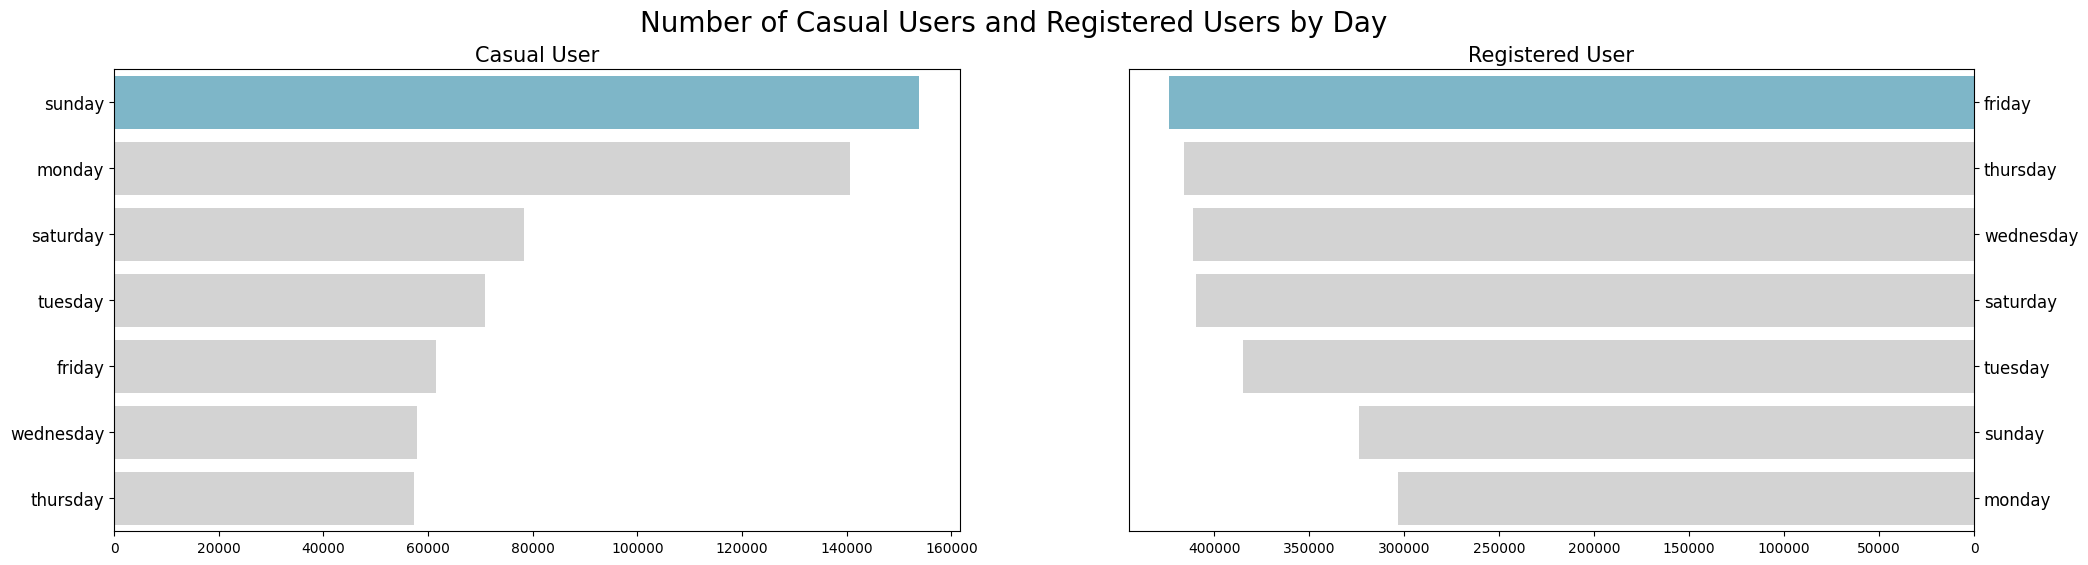

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="casual_user", y="day", data=sum_casual_user, palette=colors, hue="day", legend=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Casual User", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="registered_user", y="day", data=sum_registered_user, hue="day", legend=False, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Registered User", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Number of Casual Users and Registered Users by Day", fontsize=20)
plt.show()

**fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6)):** Baris ini membuat gambar dengan dua subplot yang diatur dalam satu baris dan dua kolom. ax adalah daftar yang berisi dua sumbu subplot.

**colors:** Ini adalah daftar warna yang digunakan untuk batang pada plot batang.

Dua plot batang Seaborn dibuat dengan menggunakan sns.barplot. Satu untuk pengguna biasa (sum_casual_user) dan satu untuk pengguna terdaftar (sum_registered_user).

Berbagai penyesuaian format dibuat untuk setiap subplot menggunakan metode seperti set_ylabel, set_xlabel, set_title, tick_params, dll.

Plt.suptitle menambahkan judul untuk seluruh subplot.

Terakhir, plt.show() menampilkan seluruh subplot.

Plot yang dihasilkan menunjukkan jumlah pengguna biasa dan pengguna terdaftar berdasarkan hari, dengan plot batang terpisah untuk setiap jenis pengguna.

Dari visualisasi di atas, dapat dilihat bahwa setiap harinya pengguna Joydhef Bike  dengan tipe "registered user" memiliki jumlah yang lebih banyak dibandingkan dengan pengguna dengan tipe "casual user".

Jika dilihat berdasarkan masing-masing tipe pengguna, pengguna dengan tipe "casual user" paling banyak terdapat pada hari Minggu dengan jumlah 153.852 pengguna. Sedangkan pengguna dengan tipe "registered_user" paling banyak di hari Jumat dengan jumlah 423.935 pengguna.

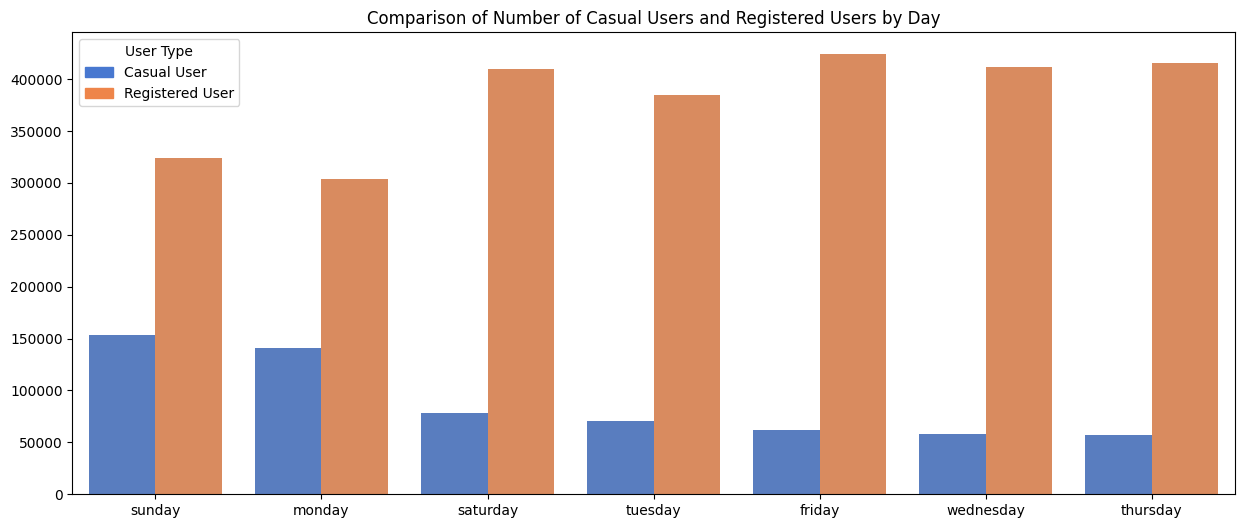

In [46]:
plt.figure(figsize=(15, 6))


sns.barplot(x="day", y="user_count", hue="user_type", data=daily_user_type, palette="muted")
plt.ylabel(None)
plt.xlabel(None)
plt.title("Comparison of Number of Casual Users and Registered Users by Day")
casual_patch = mpatches.Patch(color=sns.color_palette("muted")[0], label='Casual User')
registered_patch = mpatches.Patch(color=sns.color_palette("muted")[1], label='Registered User')
plt.legend(handles=[casual_patch, registered_patch], title="User Type")
plt.show()

**plt.figure(figsize=(15, 6)):** Garis ini menciptakan gambar dengan ukuran tertentu (lebar 15 inci dan tinggi 6 inci) untuk mengontrol ukuran plot secara keseluruhan.

**sns.barplot(x="day", y="user_count", hue="user_type", data=daily_user_type, palette="muted"):** Baris ini membuat plot batang menggunakan Seaborn. Plot ini menggunakan kolom 'hari' pada sumbu x, 'jumlah_pengguna' pada sumbu y, dan membedakan batang dengan kolom 'jenis_pengguna'. Palet warna diatur ke "tidak bersuara".

**plt.ylabel(None) and plt.xlabel(None):** Garis-garis ini menghapus label untuk sumbu x dan y.

**plt.title("Comparison of Number of Casual Users and Registered Users by Day"):** Baris ini menetapkan judul plot.

casual_patch dan registered_patch: Ini adalah patch (elemen legenda) untuk tipe pengguna biasa dan terdaftar.

**plt.legend(...):** Baris ini menambahkan legenda ke plot menggunakan pegangan legenda dan judul yang telah dibuat sebelumnya.

**plt.show():** Terakhir, perintah ini menampilkan plot.

Plot yang dihasilkan akan menunjukkan perbandingan jumlah pengguna biasa dan pengguna terdaftar untuk setiap hari, dengan bar yang dibedakan berdasarkan jenis pengguna dan legenda yang menjelaskan warnanya.

### **Joydhef Bike Productivity by Month (Question 2)**

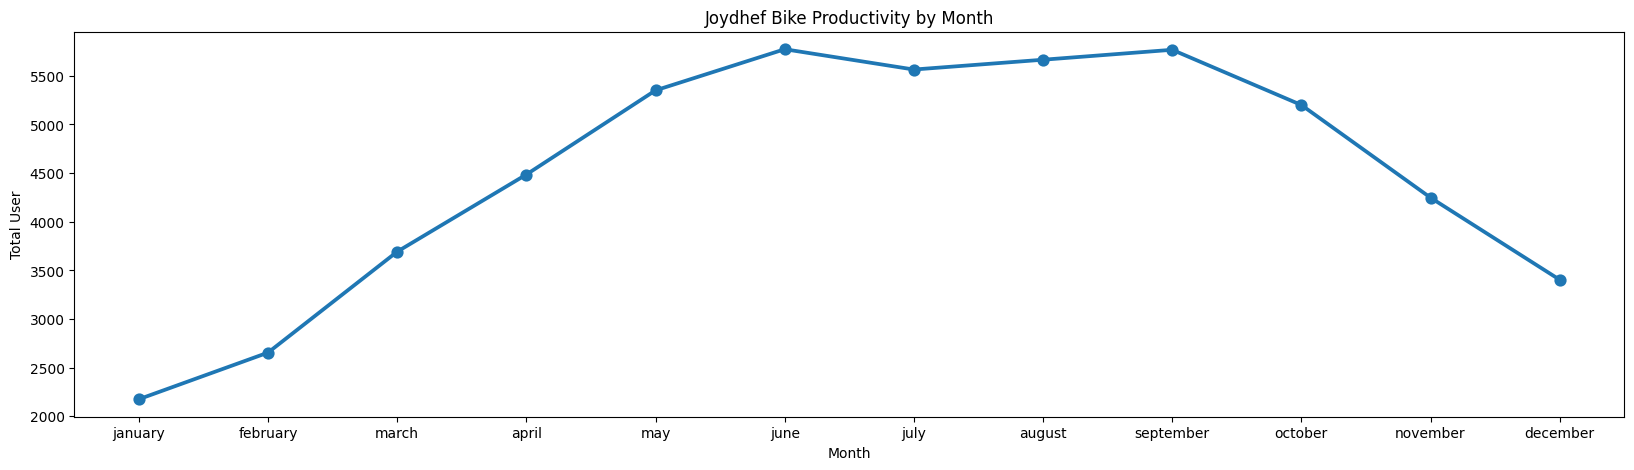

In [47]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=day, x='month', y='total_user', errorbar=None, ax=ax)
ax.set(title='Joydhef Bike Productivity by Month')
ax.set_ylabel('Total User')
ax.set_xlabel('Month')
plt.show()

### **Joydhef Bike Productivity Based on Time (Question 3)**

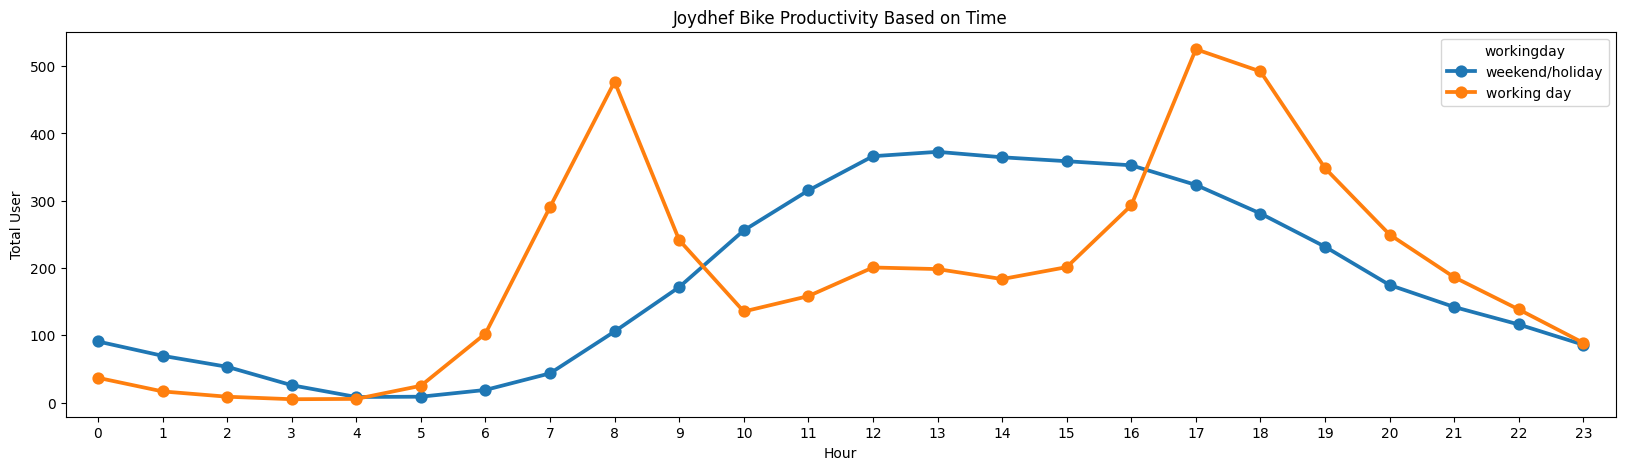

In [48]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=hour, x='hour', y='total_user', hue='workingday', errorbar=None, ax=ax)
ax.set(title='Joydhef Bike Productivity Based on Time')
ax.set_ylabel('Total User')
ax.set_xlabel('Hour')
plt.show()

Joydhef Bike memiliki produktivitas yang sangat tinggi di bulan Juni dan September dengan banyaknya pengguna yang menyewa sepeda di bulan-bulan tersebut. Sementara mulai bulan Oktober jumlah pengguna terus menurun hingga titik terendah di bulan Januari. Jumlah pengguna kembali meningkat mulai bulan Februari.

### **Weather and Season Impact on Joydhef Bike Productivity (Question 4)**

In [49]:
byweather = hour.groupby("weather").total_user.sum().sort_values(ascending=False).reset_index()
byweather

,weather,total_user
0,heavy rain,3292679


In [50]:
byseason = hour.groupby("season").total_user.sum().sort_values(ascending=False).reset_index()
byseason

,season,total_user
0,fall,1061129
1,summer,918589
2,winter,841613
3,springer,471348


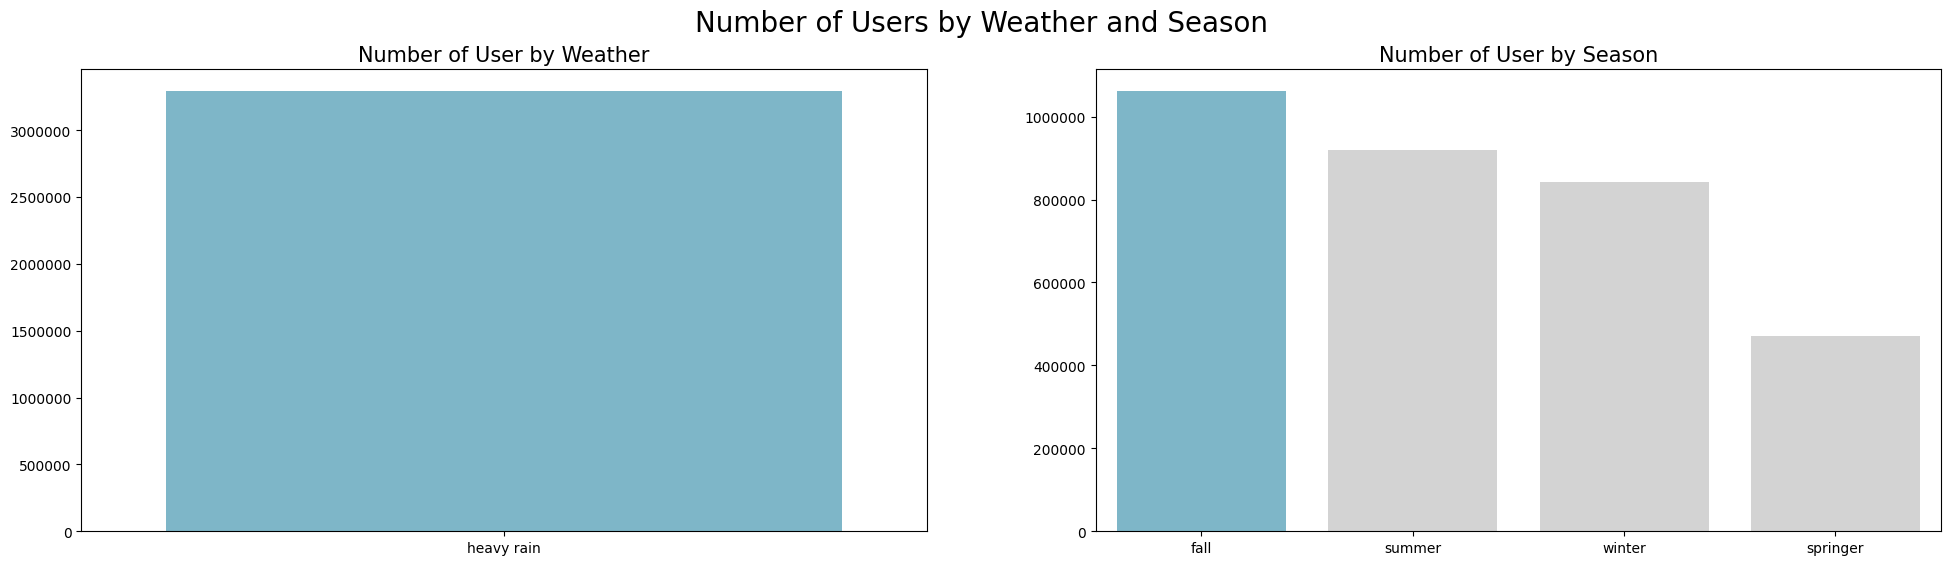

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(y="total_user", x="weather", data=byweather.sort_values(by="total_user", ascending=False), palette=colors, hue="weather", legend=False, ax=ax[0])
ax[0].set_title("Number of User by Weather", loc="center", fontsize=15)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].ticklabel_format(style='plain', axis='y')

sns.barplot(y="total_user", x="season", data=byseason.sort_values(by="total_user", ascending=False), palette=colors, hue="season", legend=False, ax=ax[1])
ax[1].set_title("Number of User by Season", loc="center", fontsize=15)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].ticklabel_format(style='plain', axis='y')

plt.suptitle("Number of Users by Weather and Season", fontsize=20)
plt.show()

Berdasarkan kondisi cuaca, Joydhef Bike memiliki produktivitas yang sangat tinggi pada saat cuaca cerah atau sedikit mendung dengan jumlah pengguna sebanyak 2.338.173 orang. Sedangkan pada saat hujan deras, badai, salju, atau kabut produktivitas Bike Sharing sangat rendah dengan hanya 223 pengguna.

Jika dilihat berdasarkan musim, produktivitas tertinggi terjadi pada musim gugur dengan jumlah pengguna sebanyak 1.061.129 orang. Sedangkan produktivitas terendah terjadi pada musim semi dengan jumlah 471.348 pengguna.

### **RFM Analysis**

In [52]:
rfm_df = day.groupby(by="day", as_index=False).agg({
    "date": "max", # retrieve the date of the last order
    "instant": "nunique", # calculate the order quantity
    "total_user": "sum" # calculate the amount of revenue generated
})

rfm_df.columns = ["day", "max_order_timestamp", "frequency", "monetary"]

# calculates when the customer last made a transaction (days)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = day["date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df

,day,frequency,monetary,recency
0,friday,104,485395,4
1,monday,105,444027,1
2,saturday,104,487790,3
3,sunday,105,477807,2
4,thursday,104,473048,5
5,tuesday,105,455503,0
6,wednesday,104,469109,6


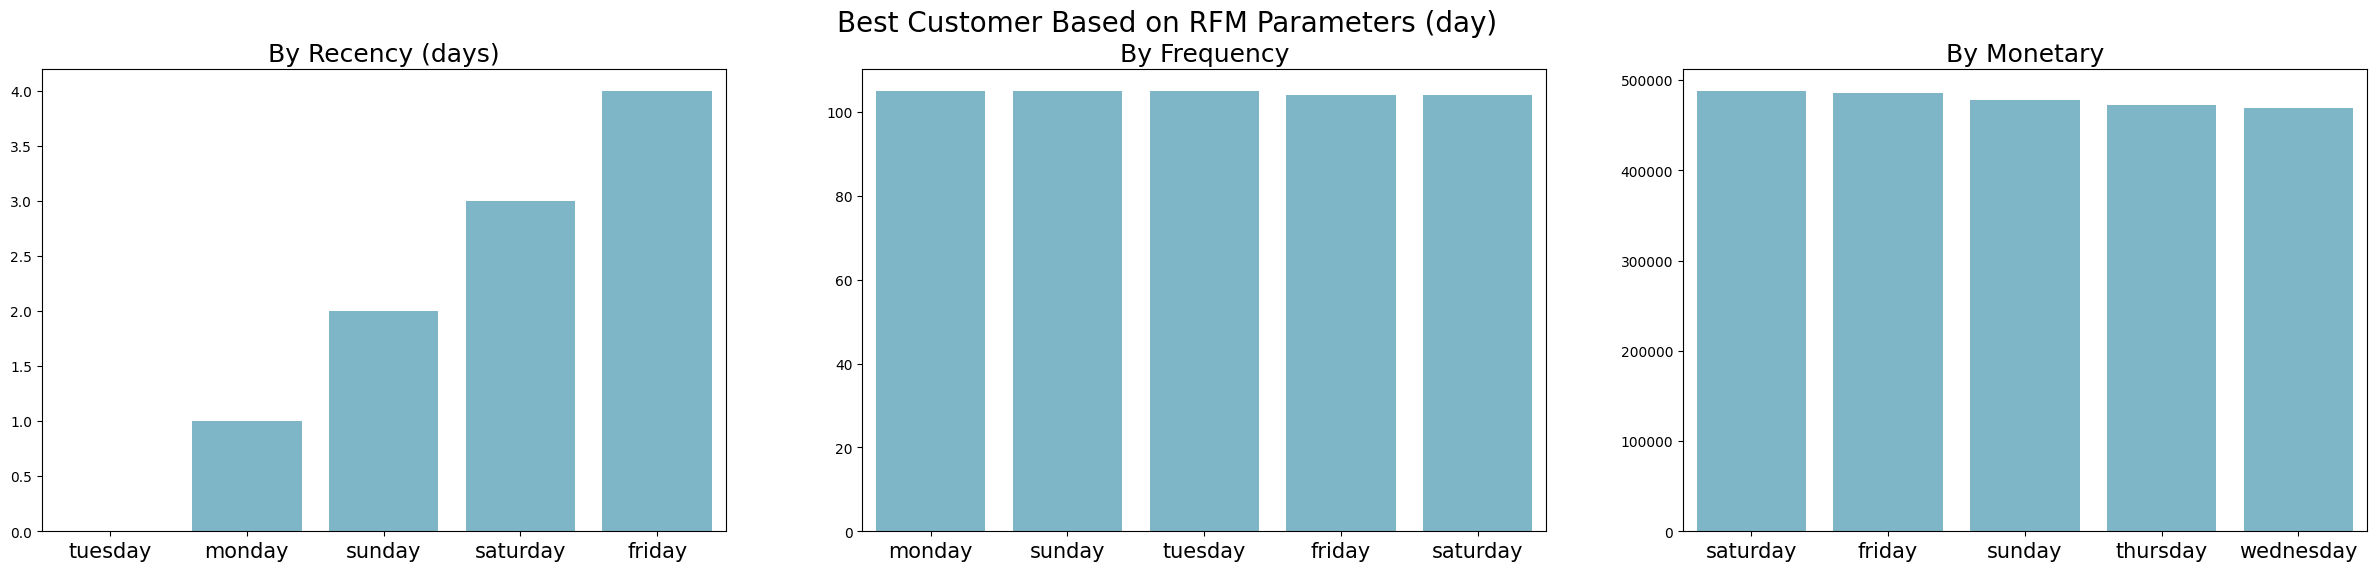

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# Bar plot for Recency
sns.barplot(y="recency", x="day", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, hue="day", legend=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

# Bar plot for Frequency
sns.barplot(y="frequency", x="day", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, hue="day", legend=False, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# Bar plot for Monetary
sns.barplot(y="monetary", x="day", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, hue="day", legend=False, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

# Overall title for the entire subplot
plt.suptitle("Best Customer Based on RFM Parameters (day)", fontsize=20)

# Display the plot
plt.show()


## Conclusion

* Secara keseluruhan, ada lebih banyak pengguna terdaftar daripada pengguna biasa. Pengguna terdaftar paling banyak ditemukan pada hari Jumat, sementara pengguna biasa paling banyak ditemukan pada hari Minggu.
* Pada hari kerja, pengguna paling banyak pada jam berangkat dan pulang kerja, sedangkan pada hari libur/akhir pekan, pengguna paling banyak pada sore hingga malam hari sekitar pukul 12.00-16.00.
* Pengguna Bike Sharing relatif sedikit pada tengah malam hingga jam 5 pagi.
* Bulan September dan Juni merupakan bulan dengan pengguna Bike Sharing terbanyak.
* Pengguna Bike Sharing lebih banyak pada saat cuaca cerah dan sangat sedikit pada saat cuaca hujan lebat.
* Pengguna Bike Sharing paling banyak pada musim gugur.